MMC Model accuracy score with rbf kernel and C=100.0 : 1.0000


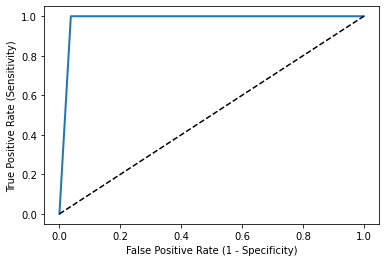

Confusion matrix

 [[154   6]
 [  0 115]]

True Positives(TP) =  154

True Negatives(TN) =  115

False Positives(FP) =  6

False Negatives(FN) =  0

Precision : 0.9625

False Positive Rate : 0.0496

Specificity : 0.9504

Stratified cross-validation scores with rbf kernel:

[1. 1. 1. 1. 1.]


In [6]:

                            
                              

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


df = pd.read_csv("data_banknote_authentication.csv")

df.columns = ['x1', 'x2', 'x3', 'x4', 'y' ]

# check for missing values in variables
df.isnull().sum()

# declare features

x = df.drop(['y'], axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# ***********************************
# Data Preprocessing(Feature Scaling)
# ***********************************

cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


# **********************************************
#         Hard Margin
# **********************************************
 
svc=SVC(kernel='rbf',C=100.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('MMC Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# ***********************************************

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# **************************************
#           confusion matrix
# **************************************
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# *****************************************

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)

print('\nPrecision : {0:0.4f}'.format(precision))

# false alarm rate
false_positive_rate = FP / float(FP + TN)


print('\nFalse Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)

print('\nSpecificity : {0:0.4f}'.format(specificity))

kfold=KFold(n_splits=5, shuffle=True, random_state=0)

rbf_scores = cross_val_score(svc, x, y, cv=kfold)

print('\nStratified cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))


SVC Model accuracy score with linear kernel and C=0.001 : 0.9018


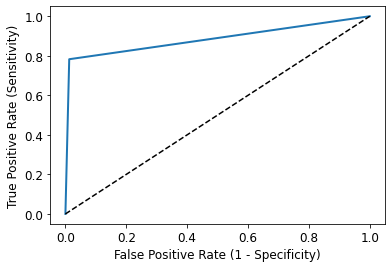

Confusion matrix

 [[158   2]
 [ 25  90]]

True Positives(TP) =  158

True Negatives(TN) =  90

False Positives(FP) =  2

False Negatives(FN) =  25

Precision : 0.9875

False Positive Rate : 0.0217

Specificity : 0.9783

Stratified cross-validation scores with linear kernel:

[0.98909091 0.99635036 0.97810219 0.99270073 0.98905109]


In [9]:
# **********************************************
#           soft margin
# **********************************************
linear_svc=SVC(kernel='linear', C=0.001) 
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)

print('SVC Model accuracy score with linear kernel and C=0.001 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

# **********************************************

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# *********************************************
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# ********************************************

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)

print('\nPrecision : {0:0.4f}'.format(precision))

# false alarm rate
false_positive_rate = FP / float(FP + TN)

print('\nFalse Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)

print('\nSpecificity : {0:0.4f}'.format(specificity))

kfold=KFold(n_splits=5, shuffle=True, random_state=0)

linear_svc=SVC(kernel='linear')

linear_scores = cross_val_score(linear_svc, x, y, cv=kfold)

print('\nStratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))
